In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import lars_path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('df_after_feature_transform.xlsx')

In [3]:
df.columns

Index(['Unnamed: 0', 'TotalLimno', 'ALLCYCADULTS', 'ALLCYCJUV', 'ALLCOPNAUP',
       'ALLROTIFERS', '11_day_temp_c', '11_day_specific_conductance',
       '11_day_ph', '11_day_dissolved_o2_mg_l', '11_day_turbidity',
       '11_day_nitrate_nitrite', '11_day_organic_matter', '11_day_salinity',
       '11_day_dissolved_o2_percent_sat', 'transformed_11day_ph',
       'transformed_11_day_temp_c', 'transformed_11_day_specific_conductance',
       'transformed_11_day_ph', 'transformed_11_day_dissolved_o2_mg_l',
       'transformed_11_day_turbidity', 'transformed_11_day_nitrate_nitrite',
       'transformed_11_day_organic_matter', 'transformed_11_day_salinity',
       'transformed_11_day_dissolved_o2_percent_sat'],
      dtype='object')

In [70]:
feature_list = ['11_day_temp_c', '11_day_specific_conductance',
       '11_day_ph', '11_day_dissolved_o2_mg_l', '11_day_turbidity',
       '11_day_nitrate_nitrite', '11_day_organic_matter', '11_day_salinity',
       '11_day_dissolved_o2_percent_sat', 'transformed_11day_ph',
       'transformed_11_day_temp_c', 'transformed_11_day_specific_conductance',
       'transformed_11_day_ph', 'transformed_11_day_dissolved_o2_mg_l',
       'transformed_11_day_turbidity', 'transformed_11_day_nitrate_nitrite',
       'transformed_11_day_organic_matter', 'transformed_11_day_salinity',
       'transformed_11_day_dissolved_o2_percent_sat','t2_temp_c', 't2_specific_conductance',
       't2_ph', 't2_dissolved_o2_mg_l', 't2_turbidity',
       't2_nitrate_nitrite', 't2_organic_matter', 't2_salinity',
       't2_dissolved_o2_percent_sat']

In [42]:


squared_feats = ['t2_temp_c', 't2_specific_conductance',
       't2_ph', 't2_dissolved_o2_mg_l', 't2_turbidity',
       't2_nitrate_nitrite', 't2_organic_matter', 't2_salinity',
       't2_dissolved_o2_percent_sat']

transformed_feats = ['transformed_11day_ph',
       'transformed_11_day_temp_c', 'transformed_11_day_specific_conductance',
       'transformed_11_day_ph', 'transformed_11_day_dissolved_o2_mg_l',
       'transformed_11_day_turbidity', 'transformed_11_day_nitrate_nitrite',
       'transformed_11_day_organic_matter', 'transformed_11_day_salinity',
       'transformed_11_day_dissolved_o2_percent_sat']
for i, item in enumerate(squared_feats):
    df[item] = df[transformed_feats[i]]**2
    
df.columns

Index(['Unnamed: 0', 'TotalLimno', 'ALLCYCADULTS', 'ALLCYCJUV', 'ALLCOPNAUP',
       'ALLROTIFERS', '11_day_temp_c', '11_day_specific_conductance',
       '11_day_ph', '11_day_dissolved_o2_mg_l', '11_day_turbidity',
       '11_day_nitrate_nitrite', '11_day_organic_matter', '11_day_salinity',
       '11_day_dissolved_o2_percent_sat', 'transformed_11day_ph',
       'transformed_11_day_temp_c', 'transformed_11_day_specific_conductance',
       'transformed_11_day_ph', 'transformed_11_day_dissolved_o2_mg_l',
       'transformed_11_day_turbidity', 'transformed_11_day_nitrate_nitrite',
       'transformed_11_day_organic_matter', 'transformed_11_day_salinity',
       'transformed_11_day_dissolved_o2_percent_sat', 't2_temp_c',
       't2_specific_conductance', 't2_ph', 't2_dissolved_o2_mg_l',
       't2_turbidity', 't2_nitrate_nitrite', 't2_organic_matter',
       't2_salinity', 't2_dissolved_o2_percent_sat'],
      dtype='object')

In [43]:
df.shape

(218, 34)

In [44]:
case = 0
if case == 0:
    X = df.iloc[:,6:]
elif case == 1:
    X = df.iloc[:,15:]
elif case == 2:
    X = df.iloc[:,6:15]
y = df['TotalLimno']

## running a basic linear regression on the data

In [45]:
lr_full = LinearRegression()

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.5900773127724361

## now a better model...

In [46]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [81]:
#X_train_val, X_test,y_train_val, y_test = train_test_split(X, y, test_size=0.15,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.2, random_state=43)
X_train_val, X_test,y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.2)

In [82]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [83]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

## Lasso

In [87]:
alphalist = 10**(np.linspace(0,1.5,1000))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):
    #X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3)
    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34165477263.424835, tolerance: 18621928.22601007
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34159180331.345707, tolerance: 18621928.22601007
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34152862524.774887, tolerance: 18621928.22601007
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

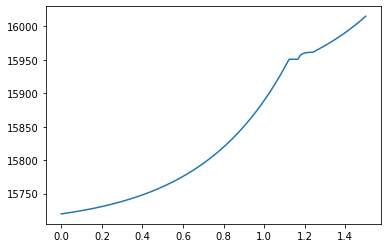

In [88]:
plt.plot(np.log10(alphalist), err_vec_val)

In [89]:
np.min(err_vec_val)

15719.730261993052

In [90]:
#ideal alpha value...
ideal_alpha = alphalist[np.argmin(err_vec_val)]
ideal_alpha

1.0

In [91]:
Lasso_model = Lasso(alpha=ideal_alpha)
Lasso_model.fit(X_train, y_train)
list(zip(feature_list, Lasso_model.coef_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36061649229.39634, tolerance: 18621928.22601007
  positive)


[('11_day_temp_c', 9149.938585199396),
 ('11_day_specific_conductance', 3.5091359282304952),
 ('11_day_ph', 20558.537652551167),
 ('11_day_dissolved_o2_mg_l', 55024.018995208804),
 ('11_day_turbidity', 854.2159556403593),
 ('11_day_nitrate_nitrite', 39365.68427836287),
 ('11_day_organic_matter', -123.85888542636827),
 ('11_day_salinity', 889.6748060001903),
 ('11_day_dissolved_o2_percent_sat', -5774.60468041838),
 ('transformed_11day_ph', -288.07965321636254),
 ('transformed_11_day_temp_c', 5572.783765079195),
 ('transformed_11_day_specific_conductance', -30937.94195860289),
 ('transformed_11_day_ph', -2249.221309678701),
 ('transformed_11_day_dissolved_o2_mg_l', 4100.057119864004),
 ('transformed_11_day_turbidity', 16595.641749392587),
 ('transformed_11_day_nitrate_nitrite', 1654.7921557246991),
 ('transformed_11_day_organic_matter', -842.6026346708956),
 ('transformed_11_day_salinity', 33140.553828464406),
 ('transformed_11_day_dissolved_o2_percent_sat', -1971.9660884692723),
 ('t2_t

In [92]:
print(Lasso_model.score(X_train, y_train))
print(Lasso_model.score(X_val, y_val))
print(Lasso_model.score(X_test, y_test))

0.6130606089113415
0.21004243455353588
0.4769990801938315


## Ridge

In [93]:
alphalist = 10**(np.linspace(-5,3,1000))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

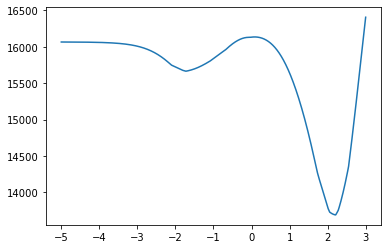

In [94]:
plt.plot(np.log10(alphalist), err_vec_val)

In [95]:
#ideal alpha value...
ideal_alpha = alphalist[np.argmin(err_vec_val)]
ideal_alpha

161.14142772530198

In [96]:
Ridge_model = Ridge(alpha=ideal_alpha)
Ridge_model.fit(X_train, y_train)
list(zip(feature_list, Ridge_model.coef_))

[('11_day_temp_c', 1518.741779163428),
 ('11_day_specific_conductance', 2.811159657658305),
 ('11_day_ph', 227.6468766881785),
 ('11_day_dissolved_o2_mg_l', -297.22097907400456),
 ('11_day_turbidity', 83.50777678574286),
 ('11_day_nitrate_nitrite', 163.2095818272617),
 ('11_day_organic_matter', 160.58807444408512),
 ('11_day_salinity', -287.63256213492065),
 ('11_day_dissolved_o2_percent_sat', -904.8278081972261),
 ('transformed_11day_ph', -875.7850375608389),
 ('transformed_11_day_temp_c', 1111.7866633555875),
 ('transformed_11_day_specific_conductance', 1049.763462488055),
 ('transformed_11_day_ph', -801.5149402816875),
 ('transformed_11_day_dissolved_o2_mg_l', 1022.8567408777228),
 ('transformed_11_day_turbidity', -233.1119417274327),
 ('transformed_11_day_nitrate_nitrite', 1301.937726316356),
 ('transformed_11_day_organic_matter', -296.5164310348282),
 ('transformed_11_day_salinity', 1125.3673432215012),
 ('transformed_11_day_dissolved_o2_percent_sat', -1672.6761301773956),
 ('t2_t

In [97]:
print(Ridge_model.score(X_train, y_train))
print(Ridge_model.score(X_val, y_val))
print(Ridge_model.score(X_test, y_test))

0.5839596368651676
0.3319993873220888
0.5213544977583265


In [23]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


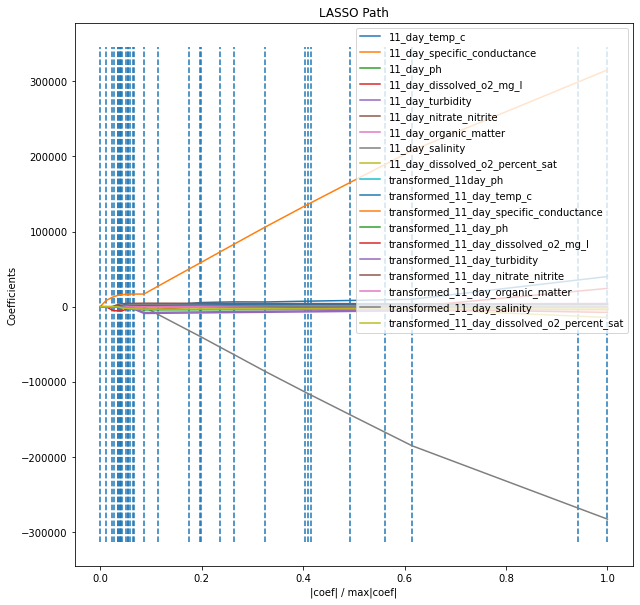

In [24]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()